In [912]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
#import peakutils
#from sklearn.preprocessing import StandardScaler ,Normalizer
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#import nippy
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [953]:
my_path = 'calibration_set/'
df_3 = pd.read_csv(my_path+'scanner_3.csv').drop(['WVN CM-1'],axis=1)
df_11 = pd.read_csv(my_path+'scanner_11.csv').drop(['WVN CM-1'],axis=1).drop(40,axis=0)
df_16 = pd.read_csv(my_path+'scanner_16.csv').drop(['WVN CM-1'],axis=1)
df_22 = pd.read_csv(my_path+'scanner_22.csv').drop(['WVN CM-1'],axis=1)
df_41 = pd.read_csv(my_path+'scanner_41.csv').drop(['WVN CM-1'],axis=1)
df_52 = pd.read_csv(my_path+'scanner_52.csv').drop(['WVN CM-1'],axis=1)
df_74 = pd.read_csv(my_path+'scanner_74.csv').drop(['WVN CM-1'],axis=1)

df_ref = pd.read_excel(my_path+'Reference values_3fills.xlsx').drop(['Sample ID'],axis=1)




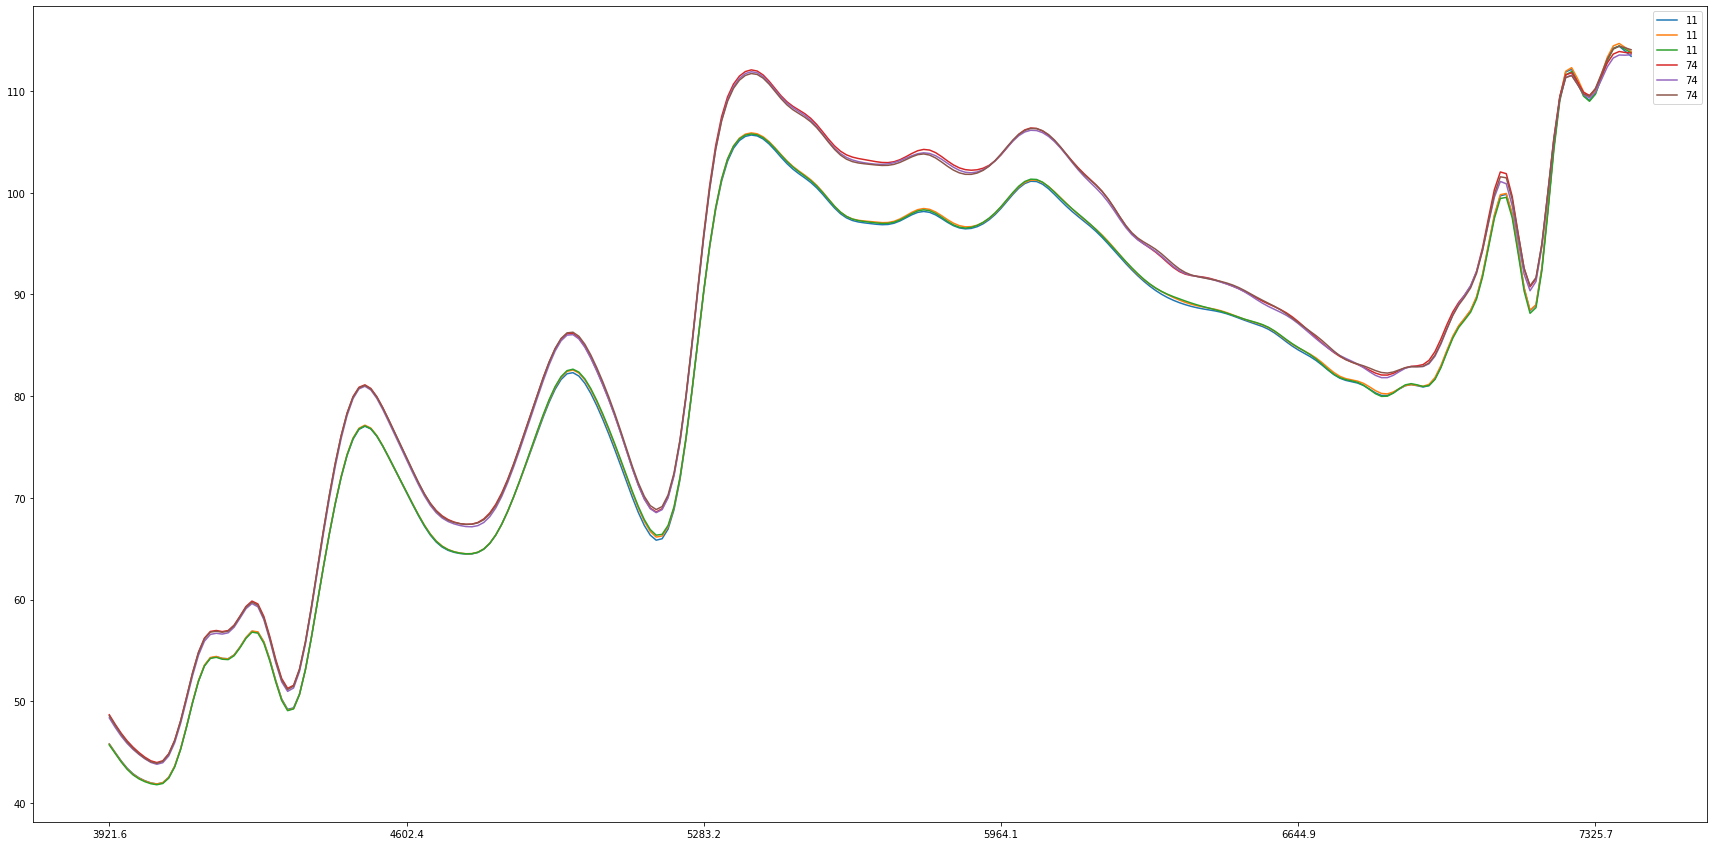

In [956]:
index = 60  # the sample number from 0 to 29
#df_3.iloc[index].plot(label='3')
#df_3.iloc[index+1].plot(label='3')
#df_3.iloc[index+2].plot(label='3')

df_11.iloc[index].plot(label='11')
df_11.iloc[index+1].plot(label='11')
df_11.iloc[index+2].plot(label='11')

#df_16.iloc[index].plot(label='16')
#df_16.iloc[index+1].plot(label='16')
#df_16.iloc[index+2].plot(label='16')


#df_22.iloc[index].plot(label='22')
#df_22.iloc[index+1].plot(label='22')
#df_22.iloc[index+2].plot(label='22')

#df_41.iloc[index].plot(label='41')
#df_41.iloc[index+1].plot(label='41')
#df_41.iloc[index+2].plot(label='41')

#df_52.iloc[index].plot(label='52')
#df_52.iloc[index+1].plot(label='52')
#df_52.iloc[index+2].plot(label='52')

df_74.iloc[index].plot(label='74')
df_74.iloc[index+1].plot(label='74')
df_74.iloc[index+2].plot(label='74')

plt.legend()

In [958]:
"""""
def augment_data(X,y,aug_factor):
    wav = X.keys()
    X_out = np.empty([X.shape[0]*aug_factor , X.shape[1]])

    


    for row in range(X.shape[0]):
        for i in range(aug_factor):
            X_out[row*aug_factor + i] = X.iloc[row] #* ( np.random.uniform(0.8,1.2))

    y_out = pd.DataFrame(np.repeat(y.values,aug_factor, axis=0), columns=y.columns)
    X_out = pd.DataFrame(X_out,columns=wav)

    return X_out,y_out
 
"""   
    


'""\ndef augment_data(X,y,aug_factor):\n    wav = X.keys()\n    X_out = np.empty([X.shape[0]*aug_factor , X.shape[1]])\n\n    \n\n\n    for row in range(X.shape[0]):\n        for i in range(aug_factor):\n            X_out[row*aug_factor + i] = X.iloc[row] #* ( np.random.uniform(0.8,1.2))\n\n    y_out = pd.DataFrame(np.repeat(y.values,aug_factor, axis=0), columns=y.columns)\n    X_out = pd.DataFrame(X_out,columns=wav)\n\n    return X_out,y_out\n \n'

In [959]:
"""""
index = 60

ratio = (df_52.iloc[3]/df_74.iloc[4])

(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
df_74.iloc[index].plot(label='74')
"""

'""\nindex = 60\n\nratio = (df_52.iloc[3]/df_74.iloc[4])\n\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\ndf_74.iloc[index].plot(label=\'74\')\n'

In [960]:
"""""
# 1. Load configuration
pipelines = nippy.read_configuration('conf1.ini')

# 2. Load data
data = df_52.to_numpy()
wavelength = np.array(df_52.keys()).astype(float)
spectra = data.T  # Rows = wavelength, Columns = samples 

# 3. Dataset through all pipelines
datasets = nippy.nippy(wavelength, spectra, pipelines)

# 4. Export the preprocessed data (showcasing three variants)
nippy.export_pipelines_to_csv('preprocessed_data', datasets, pipelines, mkdir=True)


df_52_norm = pd.read_csv('preprocessed_data/1.csv',header = None).to_numpy().T

df_52_norm = pd.DataFrame(df_52_norm)[1:]
df_52_norm.columns = wavelength

"""




'""\n# 1. Load configuration\npipelines = nippy.read_configuration(\'conf1.ini\')\n\n# 2. Load data\ndata = df_52.to_numpy()\nwavelength = np.array(df_52.keys()).astype(float)\nspectra = data.T  # Rows = wavelength, Columns = samples \n\n# 3. Dataset through all pipelines\ndatasets = nippy.nippy(wavelength, spectra, pipelines)\n\n# 4. Export the preprocessed data (showcasing three variants)\nnippy.export_pipelines_to_csv(\'preprocessed_data\', datasets, pipelines, mkdir=True)\n\n\ndf_52_norm = pd.read_csv(\'preprocessed_data/1.csv\',header = None).to_numpy().T\n\ndf_52_norm = pd.DataFrame(df_52_norm)[1:]\ndf_52_norm.columns = wavelength\n\n'

In [961]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''
 
    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc,ref)

In [962]:
wav = df_52.keys()
msc_52,ref_52 = msc(df_52.copy(deep=True).to_numpy())
msc_52 = pd.DataFrame(msc_52,columns=wav) 

In [972]:
X_train,X_test,y_train,y_test = train_test_split(msc_52,df_ref,test_size=0.3,shuffle = False )
pls = PLSRegression(n_components=7)
pls.fit(X_train,y_train)
print("score of 52 : ",pls.score(X_test,y_test))
print("root mean square error: ",np.sqrt(mean_squared_error(y_test,pls.predict(X_test))))

score of 52 :  0.8609007248452947
root mean square error:  3.800926677528495


In [973]:
msc_74,_ = msc(df_74.copy(deep=True).to_numpy())
msc_74 = pd.DataFrame(msc_74,columns=wav)

X_train,X_test,y_train,y_test = train_test_split(msc_74,df_ref,test_size=0.3,shuffle = False )

print("score of 74 : ",pls.score(X_test,y_test))
print("root mean square error: ",np.sqrt(mean_squared_error(y_test,pls.predict(X_test))))

score of 74 :  -18.947516146966358
root mean square error:  45.397456813992775


In [974]:
msc_74,_= msc(df_74.copy(deep=True).to_numpy(),reference=ref_52)
msc_74 = pd.DataFrame(msc_74,columns=wav)

X_train,X_test,y_train,y_test = train_test_split(msc_74,df_ref,test_size=0.3,shuffle = False )

print("score of 74 : ",pls.score(X_test,y_test))
print("root mean square error: ",np.sqrt(mean_squared_error(y_test,pls.predict(X_test))))

score of 74 :  0.8724301214222983
root mean square error:  3.6397538375016483
